# EDA


# Importing Libraries


In [286]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.io as pio

pio.templates.default = "plotly_dark"
sns.set_theme(style="darkgrid", font_scale=1.4)


# Importing Clean Dataset


In [287]:
dataset = pd.read_csv("./../data/Cleaned_Dataset.csv")
dataset.head()


day  month  year  Temperature  RH  Ws  Rain  FFMC  DMC    DC  ISI  BUI  \
0    1      6  2012           29  57  18   0.0  65.7  3.4   7.6  1.3  3.4   
1    2      6  2012           29  61  13   1.3  64.4  4.1   7.6  1.0  3.9   
2    3      6  2012           26  82  22  13.1  47.1  2.5   7.1  0.3  2.7   
3    4      6  2012           25  89  13   2.5  28.6  1.3   6.9  0.0  1.7   
4    5      6  2012           27  77  16   0.0  64.8  3.0  14.2  1.2  3.9   

   FWI   Classes  Region  
0  0.5  not fire  Bejaia  
1  0.4  not fire  Bejaia  
2  0.1  not fire  Bejaia  
3  0.0  not fire  Bejaia  
4  0.5  not fire  Bejaia

# Dataset Summary


In [288]:
dataset.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          244 non-null    int64  
 1   month        244 non-null    int64  
 2   year         244 non-null    int64  
 3   Temperature  244 non-null    int64  
 4   RH           244 non-null    int64  
 5   Ws           244 non-null    int64  
 6   Rain         244 non-null    float64
 7   FFMC         244 non-null    float64
 8   DMC          244 non-null    float64
 9   DC           244 non-null    float64
 10  ISI          244 non-null    float64
 11  BUI          244 non-null    float64
 12  FWI          244 non-null    float64
 13  Classes      244 non-null    object 
 14  Region       244 non-null    object 
dtypes: float64(7), int64(6), object(2)
memory usage: 28.7+ KB


In [289]:
dataset.describe()


day       month    year  Temperature          RH          Ws  \
count  244.000000  244.000000   244.0   244.000000  244.000000  244.000000   
mean    15.754098    7.500000  2012.0    32.172131   61.938525   15.504098   
std      8.825059    1.112961     0.0     3.633843   14.884200    2.810178   
min      1.000000    6.000000  2012.0    22.000000   21.000000    6.000000   
25%      8.000000    7.000000  2012.0    30.000000   52.000000   14.000000   
50%     16.000000    7.500000  2012.0    32.000000   63.000000   15.000000   
75%     23.000000    8.000000  2012.0    35.000000   73.250000   17.000000   
max     31.000000    9.000000  2012.0    42.000000   90.000000   29.000000   

             Rain        FFMC         DMC          DC         ISI         BUI  \
count  244.000000  244.000000  244.000000  244.000000  244.000000  244.000000   
mean     0.760656   77.887705   14.673361   49.288115    4.759836   16.673361   
std      1.999406   14.337571   12.368039   47.619662    4.154628   14.201648   
min      0.000000   28.600000    0.700000    6.900000    0.000000    1.100000   
25%      0.000000   72.075000    5.800000   13.275000    1.400000    6.000000   
50%      0.000000   83.500000   11.300000   33.100000    3.500000   12.450000   
75%      0.500000   88.300000   20.750000   68.150000    7.300000   22.525000   
max     16.800000   96.000000   65.900000  220.400000   19.000000   68.000000   

              FWI  
count  244.000000  
mean     7.049180  
std      7.428366  
min      0.000000  
25%      0.700000  
50%      4.450000  
75%     11.375000  
max     31.100000

In [290]:
dataset.describe(include="O")


Classes  Region
count      244     244
unique       2       2
top       fire  Bejaia
freq       138     122

In [291]:
dataset["Classes"].value_counts(normalize=True)


fire        0.565574
not fire    0.434426
Name: Classes, dtype: float64

OBSERVATION

- 13 Numerical features, 2 Categorical Feature (Target feature included)
- Categorical feature `Region` is balanced and `Classes` (target) is fairly balanced in 56:43, independent of each other.
- `day`, `month` and `year` are as separate feature.
- 2012 is the only `year` and `month` is from 6th to 9th.

TODO

- We can drop `year` as it is constant.
- Does `day` affect the outcome and rain fall.


In [292]:
dataset.columns


Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

In [293]:
df = dataset.drop(["year"], axis=1)
df.head()


day  month  Temperature  RH  Ws  Rain  FFMC  DMC    DC  ISI  BUI  FWI  \
0    1      6           29  57  18   0.0  65.7  3.4   7.6  1.3  3.4  0.5   
1    2      6           29  61  13   1.3  64.4  4.1   7.6  1.0  3.9  0.4   
2    3      6           26  82  22  13.1  47.1  2.5   7.1  0.3  2.7  0.1   
3    4      6           25  89  13   2.5  28.6  1.3   6.9  0.0  1.7  0.0   
4    5      6           27  77  16   0.0  64.8  3.0  14.2  1.2  3.9  0.5   

    Classes  Region  
0  not fire  Bejaia  
1  not fire  Bejaia  
2  not fire  Bejaia  
3  not fire  Bejaia  
4  not fire  Bejaia

# Overall Data


## Correlation


In [294]:
def plot_corr(corr_data):
    plt.figure(figsize=(15, 10))
    mask = np.triu(np.ones_like(corr_data))
    ax = sns.heatmap(corr_data, mask=mask, fmt=".2f", annot=True, linewidths=0.5, cmap="PuOr", center=0)
    return ax


In [295]:
corr_df = df.corr()


<AxesSubplot:>

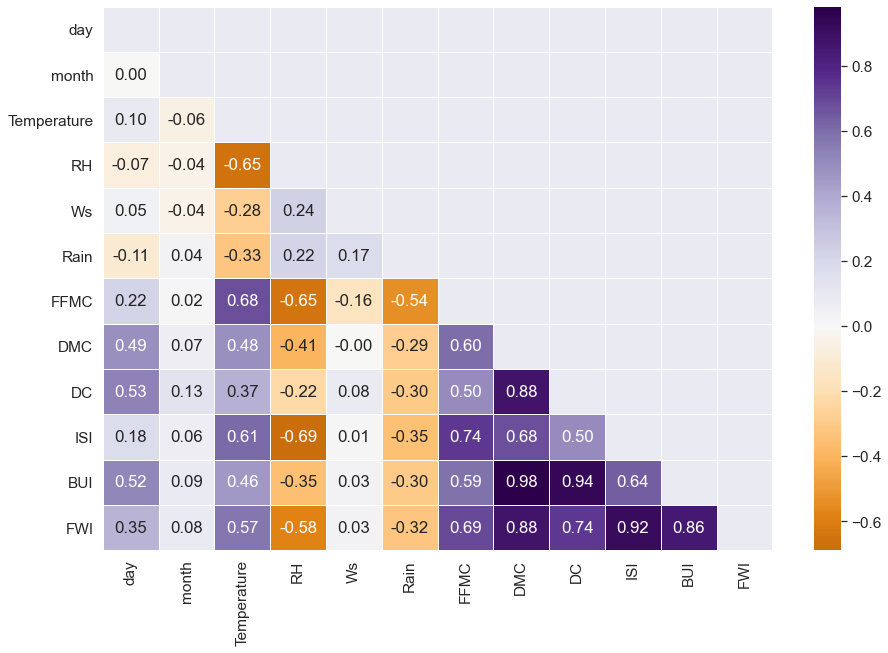

In [296]:
plot_corr(corr_df)
# px.imshow(corr_df,text_auto='.2f')


OBSERVATION

- Darker shades represent high correlation.
- `BUI`-`DMC`, `BUI-DC` and `FWI`-`ISI` has high correlation i.e. more than `0.9`.


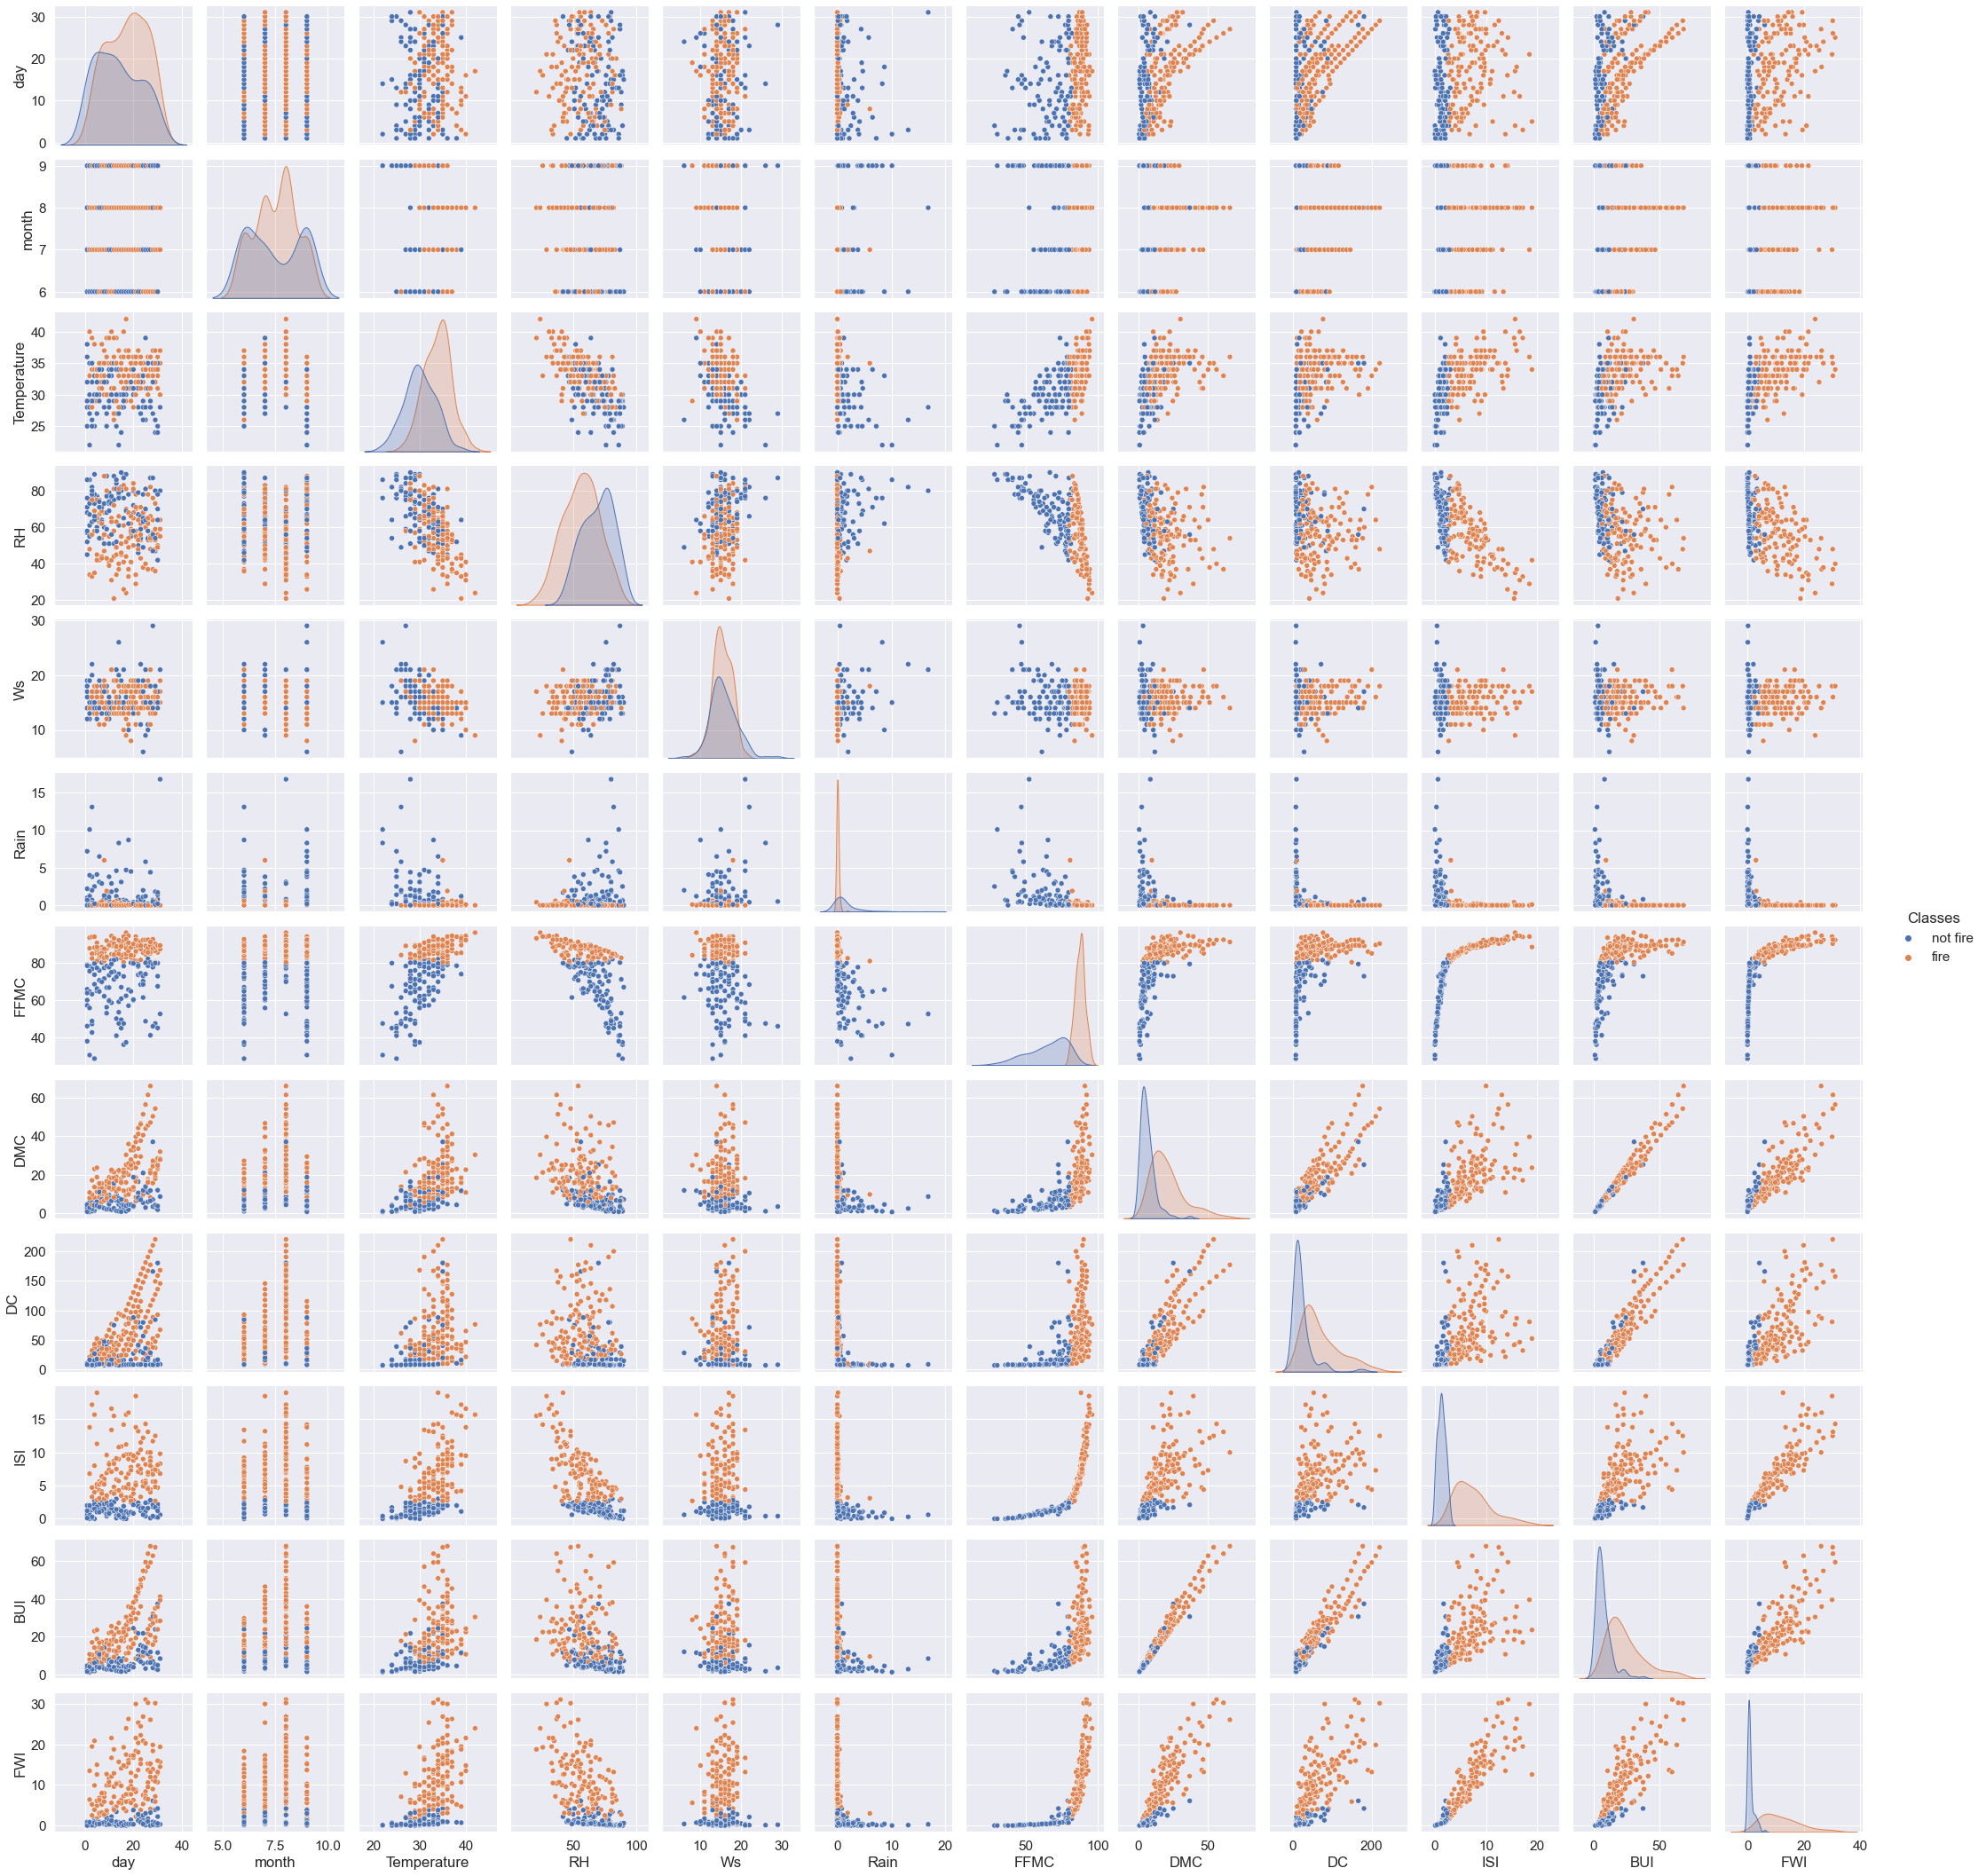

In [297]:
sns.pairplot(df, hue="Classes")


OBSERVATION

- most variable are separable as a cluster or are lightly overlapping.
- only `RH` and `Temperature` is negatively correlated.
- Bivariate Data is positively correlated or skewed or no relation at all.
- 50% of feature has Normal Distribution or right skewed distribution with exception of `FFMC` which is left skewed. (Univariate)


# wrt `day` and `month`


## With `Classes`


In [298]:
df[df["Classes"] == "fire"].groupby(["Region", "Classes", "month"])[["day"]].count()


day
Region         Classes month     
Bejaia         fire    6       13
                       7       15
                       8       24
                       9        7
Sidi-Bel Abbes fire    6       12
                       7       24
                       8       27
                       9       16

OBSERVATION

- 6th and 9th `month` has comparatively less day when fire occurred compare to `7th` and `8th` month.
- `day` coupled with `month` can provide better insight regarding `Classes` and other features.


<AxesSubplot:xlabel='month', ylabel='count'>

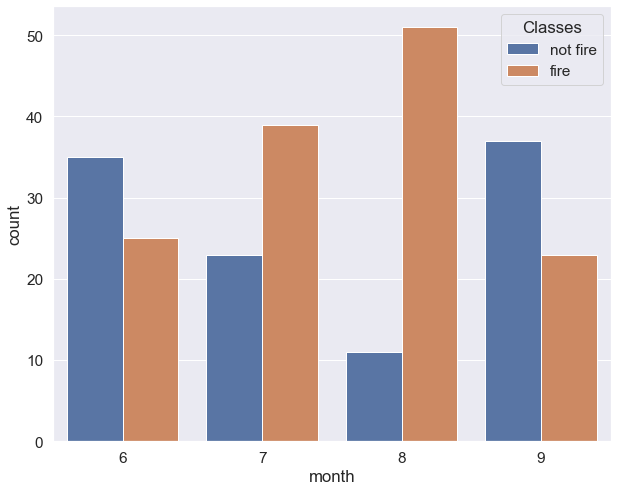

In [299]:
plt.figure(figsize=(10, 8))
sns.countplot(data=df, x="month", hue="Classes")


In [300]:
px.histogram(df, x="month", color="Classes", barmode="group")


OBSERVATION

- Most fire is in 7th and 8th `month`
- Ordinal Encoding can help in the following order 8, 7, 6, 9 for months


## With Numerical Feature


In [301]:
def plot_perday_monthly_feature(y_feature: str):
    fig = px.line(
        df,
        x="day",
        y=y_feature,
        color="month",
        title=f"{y_feature} per Day",
        facet_row="Region",
        labels={"day": "Day", "month": "Month"},
    )
    # fig.update_layout(xaxis_tickvals=np.arange(1, 32))  # ,xaxis_title="Day",legend_title='Month'
    fig.update_xaxes(tickvals=np.arange(1, 32))
    return fig


In [302]:
num_feature = [col_name for col_name in df.columns if df[col_name].dtype != "O"]
num_feature


['day',
 'month',
 'Temperature',
 'RH',
 'Ws',
 'Rain',
 'FFMC',
 'DMC',
 'DC',
 'ISI',
 'BUI',
 'FWI']

In [303]:
for feature in num_feature:
    if feature in ["day", "month"]:
        continue
    fig = plot_perday_monthly_feature(feature)
    fig.show()


OBSERVATION

- Humidity is high in 6th and 9th `month`
- Temperature is high in 7th and 8th `month`
- Rainfall is less in 7th and 8th `month` compare to other month in season.
- Due to above observations, this can be factor for more fire in 7th and 8th `month`.
- For Weather Data we can see end date values of previous month follow the trend of next month starting days.
- This confirms `day` and `month` should be coupled together.
- **`day` should be considered as `categorical` data instead of `ordinal` as value on 1st day does not follow the trend for 30th or 31st day in weather data.**
- **`month` can be considered as ordinal data in sequence of 8>7>6>9**


# wrt `Region`


In [304]:
px.histogram(df, x="Region", color="Classes", barmode="group", title="No. of Fire days, based on Region")


In [305]:
df.groupby(["Region", "Classes"])[["day"]].count()


day
Region         Classes      
Bejaia         fire       59
               not fire   63
Sidi-Bel Abbes fire       79
               not fire   43

OBSERVATION

- **Sidi-Bel Abbes** has more fire cases compare to **Bejaia** region.
- **Sidi-Bel Abbes** has twice more fire `day` than non-fire `day`.
- **Bejaia** region has nearly same no. of `days` for fire and not fire.


## Strip Plot


In [306]:
def plot_region_based_feature(y_feature: str):
    fig = px.strip(
        df,
        x="Region",
        y=y_feature,
        color="Classes",
        title=f"{y_feature} VS Region",
    )
    fig.update_traces(marker=dict(opacity=0.4, size=10, line_width=1))
    return fig


In [307]:
for feature in num_feature:
    fig = plot_region_based_feature(feature)
    fig.show()


In [308]:
with pd.option_context("display.max_columns", None):
    display(df.groupby(["Region", "Classes"]).agg(["mean", "median", "count"]))


day                  month               \
                              mean median count      mean median count   
Region         Classes                                                   
Bejaia         fire      18.542373   20.0    59  7.423729    8.0    59   
               not fire  13.142857   12.0    63  7.571429    7.0    63   
Sidi-Bel Abbes fire      16.392405   16.0    79  7.594937    8.0    79   
               not fire  14.581395   14.0    43  7.325581    7.0    43   

                        Temperature                      RH               \
                               mean median count       mean median count   
Region         Classes                                                     
Bejaia         fire       32.881356   33.0    59  63.644068   64.0    59   
               not fire   29.587302   30.0    63  72.031746   76.0    63   
Sidi-Bel Abbes fire       34.518987   35.0    79  50.772152   48.0    79   
               not fire   30.674419   30.0    43  65.325581   64.0    43   

                                Ws                   Rain               \
                              mean median count      mean median count   
Region         Classes                                                   
Bejaia         fire      15.644068   15.0    59  0.013559    0.0    59   
               not fire  16.333333   16.0    63  1.619048    0.5    63   
Sidi-Bel Abbes fire      15.113924   15.0    79  0.159494    0.0    79   
               not fire  14.813953   15.0    43  1.632558    0.8    43   

                              FFMC                     DMC               \
                              mean median count       mean median count   
Region         Classes                                                    
Bejaia         fire      86.579661   86.8    59  19.472881   15.6    59   
               not fire  63.522222   66.6    63   5.611111    4.5    63   
Sidi-Bel Abbes fire      88.265823   88.7    79  22.127848   19.4    79   
               not fire  67.941860   71.4    43   7.669767    6.4    43   

                                DC                    ISI               \
                              mean median count      mean median count   
Region         Classes                                                   
Bejaia         fire      84.516949   71.5    59  6.242373    5.7    59   
               not fire  23.795238   10.2    63  1.233333    1.2    63   
Sidi-Bel Abbes fire      59.873418   45.1    79  8.325316    8.0    79   
               not fire  18.853488    9.1    43  1.341860    1.3    43   

                               BUI                     FWI               
                              mean median count       mean median count  
Region         Classes                                                   
Bejaia         fire      24.550847   19.2    59  10.537288    9.7    59  
               not fire   6.880952    5.1    63   0.933333    0.5    63  
Sidi-Bel Abbes fire      23.473418   19.2    79  12.608861   10.9    79  
               not fire   7.718605    6.2    43   1.009302    0.7    43

In [309]:
df["Rain"].unique()


array([ 0. ,  1.3, 13.1,  2.5,  0.2,  1.2,  0.5,  3.1,  0.7,  0.6,  0.3,
        0.1,  0.4,  1. ,  1.4,  0.8, 16.8,  7.2, 10.1,  3.8,  0.9,  1.8,
        4.6,  8.3,  5.8,  4. ,  2. ,  4.7,  8.7,  4.5,  1.1,  1.7,  2.2,
        6. ,  1.9,  2.9,  4.1,  6.5,  4.4])

In [310]:
df[df["Rain"] > 2]["Region"].value_counts()


Sidi-Bel Abbes    13
Bejaia            10
Name: Region, dtype: int64

OBSERVATION

- **Sidi-Bel Abbes** has more values of those features which can highly contribute as the reason for `fire` compare to values of **Bejaia** region.
- Slightly more value of `Temperature` in **Sidi-Bel Abbes** compare to **Bejaia** region.
- `Humidity` in **Bejaia** region on fire or non-fire day has similar range from 40-90, whereas for the **Sidi-Bel Abbes** `humidity` varies from 20-90 during fire days.
- Wind Speed `Ws` mean/median value is same irrespective of region.
- **Bejaia** region gets more amount of `rainfall` compare to **Sidi-bel Abbes** with highest recorded at 16.8mm and 8.7mm in respective region.
- Mean value of `Rain` and no. of days of `Rain` is higher for **Sidi-Bel Abbes** than **Bejaia**. But still Fire occurs in **Siddi-Bel Abbes** more frequently.
- Median value of `Rain` on day of fire is 0 in both the region.


# Outliers

- Range is already provided for every feature in dataset information as mentioned in [Data Cleaning](./01-data_cleaning.ipynb).
- How to deal with outliers will depend upon the no. of outliers and if they are in permissible range.


In [311]:
px.box(df, y=num_feature, title="Boxplot")  # .update_traces(marker_outliercolor='red')


OBSERVATION

- Outlier are present in most of the features.


## Boxplot on the basis of `Classes`


In [312]:
px.box(df, y=num_feature, color="Classes", title="Boxplot by Classes")


OBSERVATION

- Data points which seems to be outlier in general boxplot graph when segregated into `fire` and `not fire` points that outlier can have significant effect on the target.
- When boxplot is plotted wrt `Classes` most of the outlier seems to be faded compare to in-general box-plot.
- Concerning outliers which can negatively affect the model are from `DMC`, `DC` and `BUI` as outlier for one of the class is in IQR range of other class if considered independently.
  - Outlier of `DC-not fire` is in permissible range of `DC-fire`.
- As multiple simultaneous feature, outlier won't affect our model in addition that all values are within range


# Distribution of Feature


In [313]:
discrete_feature = [col_name for col_name in num_feature if df[col_name].nunique() < 35]
discrete_feature


['day', 'month', 'Temperature', 'Ws']

In [314]:
continuous_feature = [col_name for col_name in num_feature if col_name not in discrete_feature]
continuous_feature


['RH', 'Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'FWI']

In [315]:
def plot_distribution(feature: str):
    ax = px.histogram(
        df, x=feature, title=f"Distribution of {feature}", color="Classes", barmode="stack", marginal="rug"
    )
    ax.update_traces(marker_line_width=0.3, marker_line_color="white")
    return ax


In [316]:
for feature in df.columns:
    ax = plot_distribution(feature)
    ax.show()


OBSERVATION

- skewness is present for continuous feature.


## Distribution with Log Transformation


In [334]:
def plot_hist_kde_with_log(feature):
    fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=(12, 6))
    sns.histplot(kde=True, x=df[feature], ax=ax1)
    if not (df[feature].isin([0]).any() or df[feature].dtype == "O"):
        sns.histplot(kde=True, x=np.log(df[feature]), ax=ax2)
        ax2.set_title(f"Log Transform of {feature}")
    else:
        ax2.set_title(f"{feature} has value of 0 or Categorical Feature")
    ax1.set_title(f"{feature}")
    ax1.set_xlabel("")
    ax2.set_xlabel("")
    fig.suptitle(f"{feature} Distribution")
    return fig


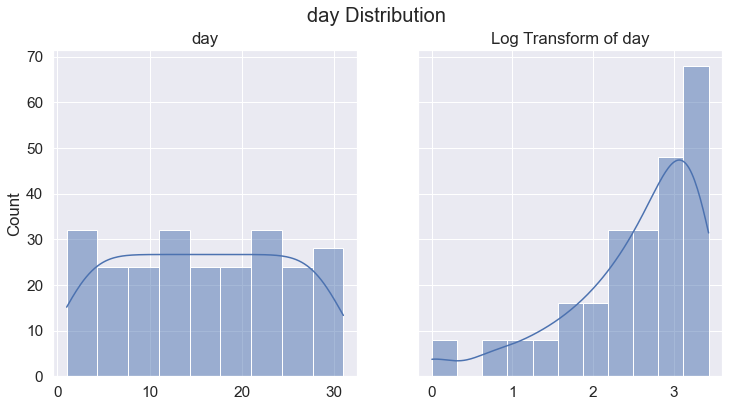

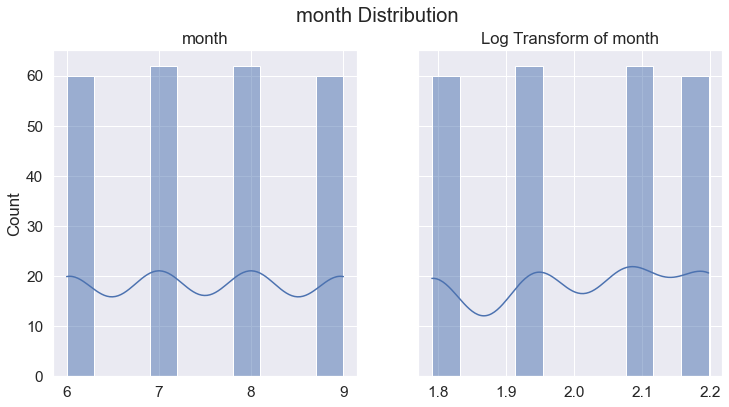

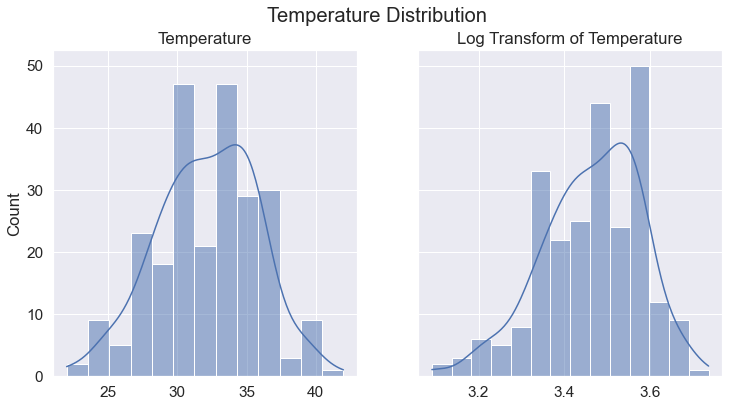

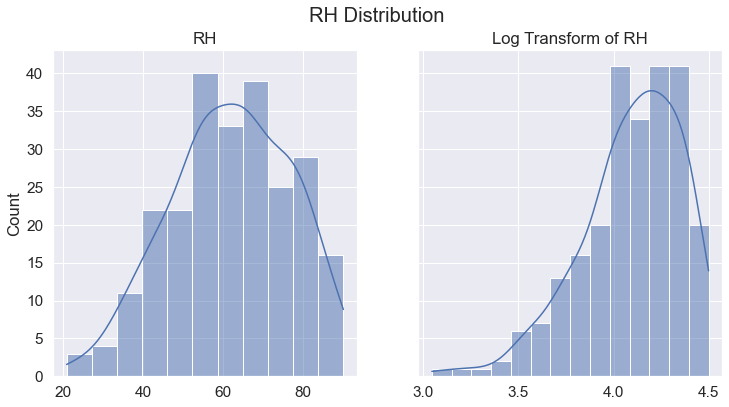

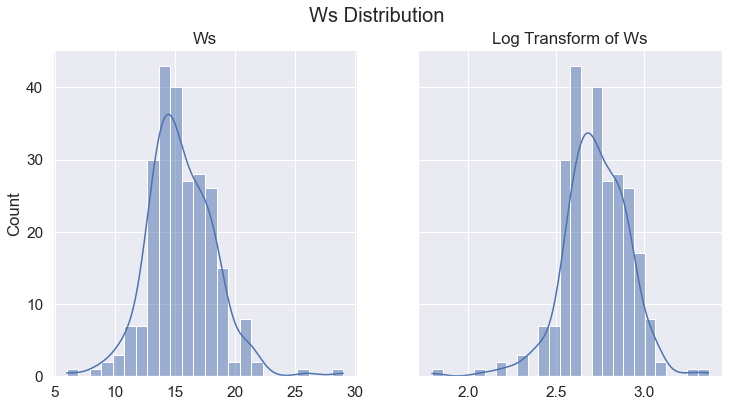

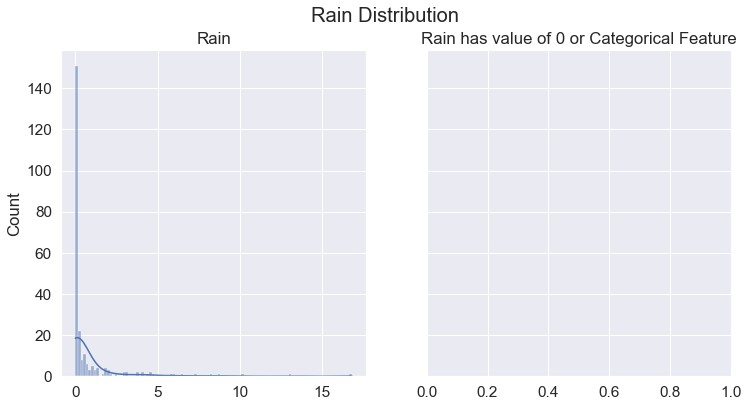

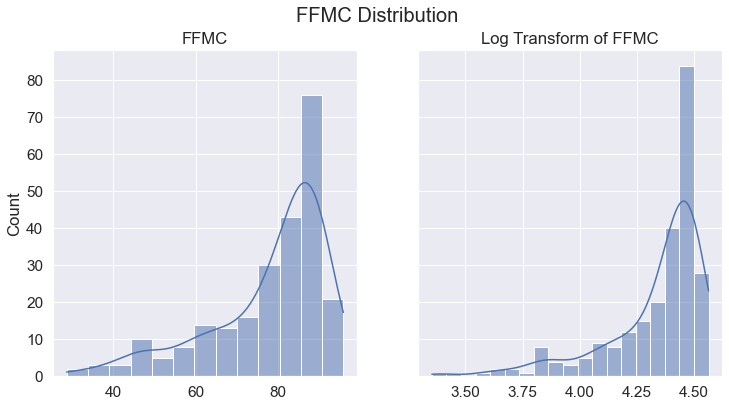

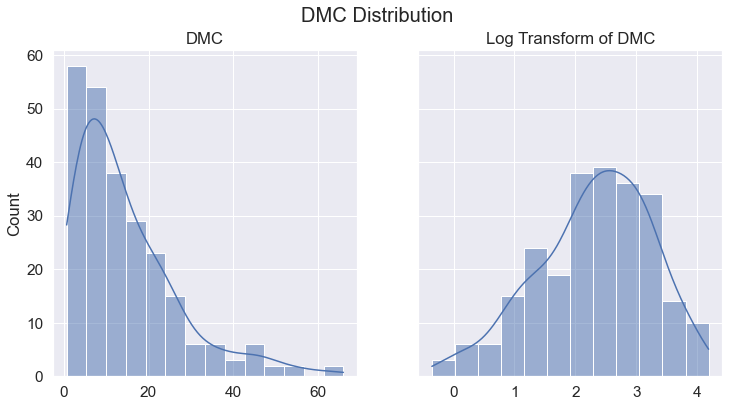

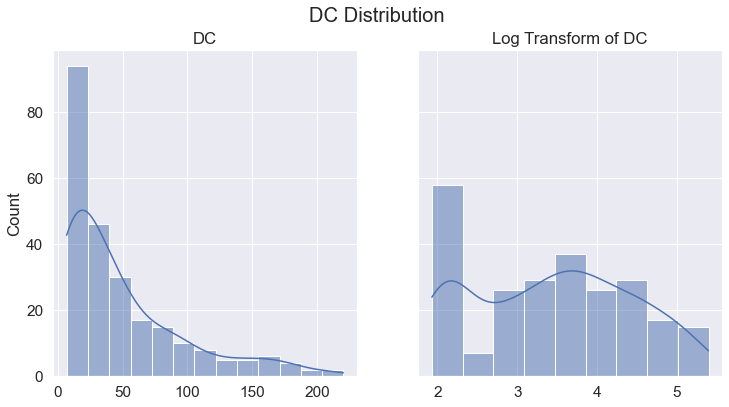

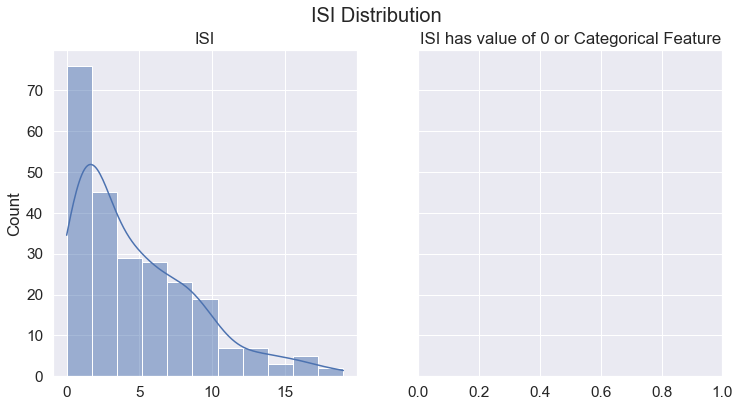

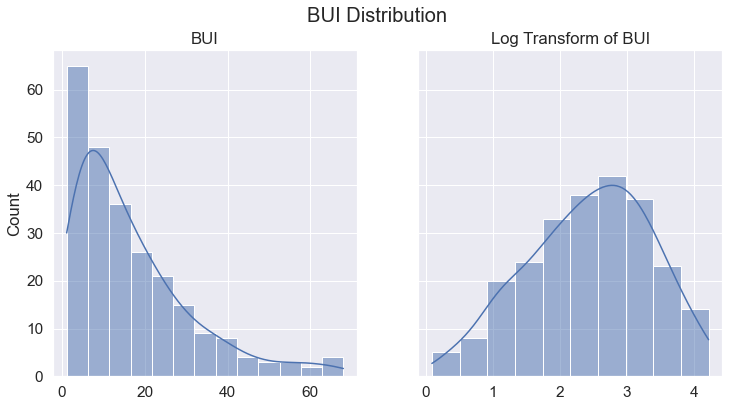

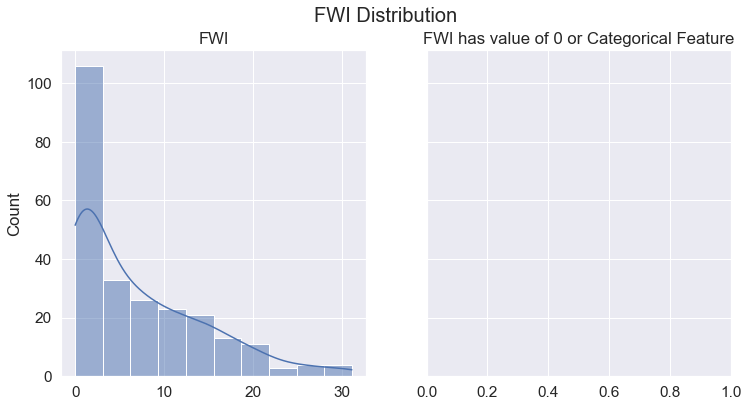

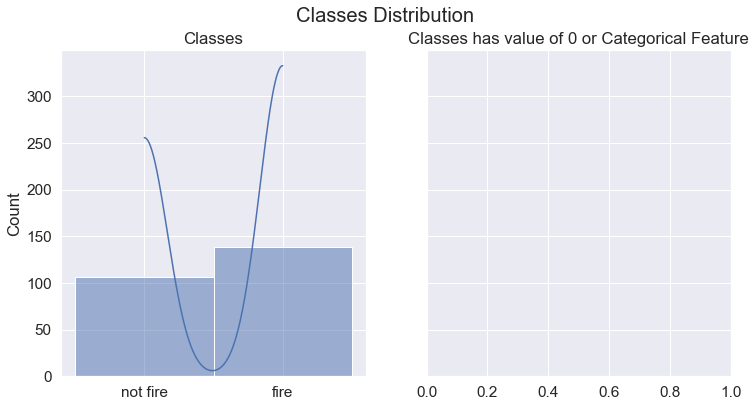

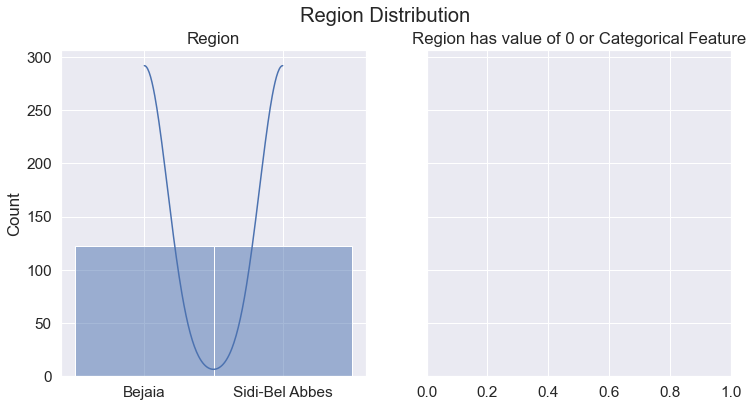

In [335]:
for feature in df.columns:
    plot_hist_kde_with_log(feature)
    plt.show()


OBSERVATION

- Discrete feature are fairly normally distributed.
- Continuous feature are skewed. When log-transformation is applied most of the feature has normal distribution.
